LDA Semua Bintang

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from google.colab import files

# Membaca file CSV
df = pd.read_csv('whatsapp_appstore.csv')

# Load data
texts = df['ulasan'].dropna().astype(str).tolist()

# Tokenisasi
tokenized_reviews = [text.split() for text in texts]

# Membuat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Menggunakan 10 topik secara langsung
num_topics = 10
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

# Menghitung coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f'Jumlah Topik: {num_topics}, Coherence Score: {coherence_score}')

# Visualisasi topik LDA dengan 10 topik
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


Saving whatsapp_appstore.csv to whatsapp_appstore (3).csv
Jumlah Topik: 10, Coherence Score: 0.38425978370361


NMF Semua Bintang

In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
from wordcloud import WordCloud

# Membaca file CSV
df = pd.read_csv('whatsapp_appstore.csv')
df['ulasan'] = df['ulasan'].fillna("")  # Mengganti NaN dengan string kosong

# Tokenisasi teks
tokenized_reviews = [text.split() for text in df['ulasan']]

# Membuat dictionary dan corpus
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Tetapkan jumlah topik menjadi 10
n_topics = 10
lda_model = models.LdaModel(corpus, num_topics=n_topics, id2word=dictionary, passes=15, random_state=42)

# Visualisasi menggunakan pyLDAvis
data_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(data_vis)


Bertopic Semua Bintang


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from gensim.models import LdaModel, CoherenceModel
from gensim.corpora.dictionary import Dictionary
import IPython.display as display

# Membaca file CSV
df = pd.read_csv('whatsapp_appstore.csv')
texts = df['ulasan'].dropna().astype(str).tolist()

# Load model transformer untuk embedding
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Vectorizer
vectorizer_model = CountVectorizer(ngram_range=(1, 2))

# Tetapkan jumlah topik menjadi 3
nr_topics = 3

try:
    # Inisialisasi dan fit BERTopic dengan 3 topik
    model = BERTopic(embedding_model=embedding_model, vectorizer_model=vectorizer_model, nr_topics=nr_topics)
    topics, probs = model.fit_transform(texts)

    # Ambil topik dan validasi jumlah topik
    topic_freq = model.get_topic_freq()
    actual_topics = len(topic_freq[topic_freq['Topic'] != -1])  # Hitung jumlah topik valid (exclude -1)

    if actual_topics < 1:
        print(f"Jumlah topik tidak valid.")
    else:
        # Persiapkan data untuk CoherenceModel
        topic_words = model.get_topics()
        topic_list = [[word for word, _ in words] for topic_id, words in topic_words.items() if topic_id != -1]
        texts_tokenized = [text.split() for text in texts]
        dictionary = Dictionary(texts_tokenized)

        # Hitung coherence score
        coherence_model = CoherenceModel(topics=topic_list, texts=texts_tokenized, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        print(f'Jumlah Topik: {nr_topics}, Coherence Score: {coherence_score}')

        # Visualisasi distribusi topik
        model.visualize_topics()

        # Visualisasi distribusi dokumen per topik
        topic_distribution = pd.DataFrame({'Topic': topics, 'Text': texts})
        topic_counts = topic_distribution['Topic'].value_counts()

        if not topic_counts.empty:
            plt.figure(figsize=(10, 5))
            topic_counts.plot(kind='bar', color='skyblue')
            plt.xlabel('Topik')
            plt.ylabel('Jumlah Dokumen')
            plt.title('Distribusi Topik dalam Dokumen')
            plt.grid(True)
            plt.show()
        else:
            print("Tidak ada topik yang ditemukan untuk divisualisasikan.")

        # ==================== Tambahan: PyLDAvis untuk Visualisasi Topik ====================
        print("\nMenampilkan PyLDAvis...")

        # Konversi hasil BERTopic ke dalam format LDA
        corpus = [dictionary.doc2bow(text) for text in texts_tokenized]
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=nr_topics, passes=10, random_state=42)

        # Menampilkan pyLDAvis di output cell
        vis = gensimvis.prepare(lda_model, corpus, dictionary)
        display.display(pyLDAvis.display(vis))

except ValueError as e:
    print(f"Error: {e}")


Jumlah Topik: 3, Coherence Score: 0.49548378616040734
Error: zero-size array to reduction operation maximum which has no identity


LDA PER RATING

Saving whatsapp_appstore.csv to whatsapp_appstore (4).csv

=== Proses untuk Rating 1 ===

Topik untuk Rating 1:
Topik 1: iphone, wa, 6, miring, kamera, gabisa, gambar, vc, whatsapp, tema
Topik 2: tema, ga, update, wa, whatsapp, ai, chat, meta, fitur, muncul
Topik 3: status, wa, whatsapp, aplikasi, perbaiki, liat, ios, akun, perbarui, bug
Topik 4: tema, update, pink, wa, ga, chat, hp, warna, kebagian, whatsapp
Topik 5: rotasi, vc, miring, call, video, jelek, hp, bug, layar, lock
Topik 6: wa, whatsapp, tema, chat, ga, update, fitur, gak, hd, story
Topik 7: update, gak, fitur, dapet, ga, tema, masuk, apk, chat, bubble
Topik 8: wa, update, ga, tampilan, ios, buka, story, tema, versi, terbaru
Topik 9: wa, gak, chat, video, tema, jelek, call, ga, blokir, hp
Topik 10: pesan, wa, masuk, aplikasi, buka, notif, muncul, membuka, chat, langsung
Topik 11: fitur, wa, gak, hd, hilang, update, kamera, ios, hapus, ga
Topik 12: chat, tema, warna, bubble, fitur, update, terbaru, wa, jelek, ai
Topik 13: w

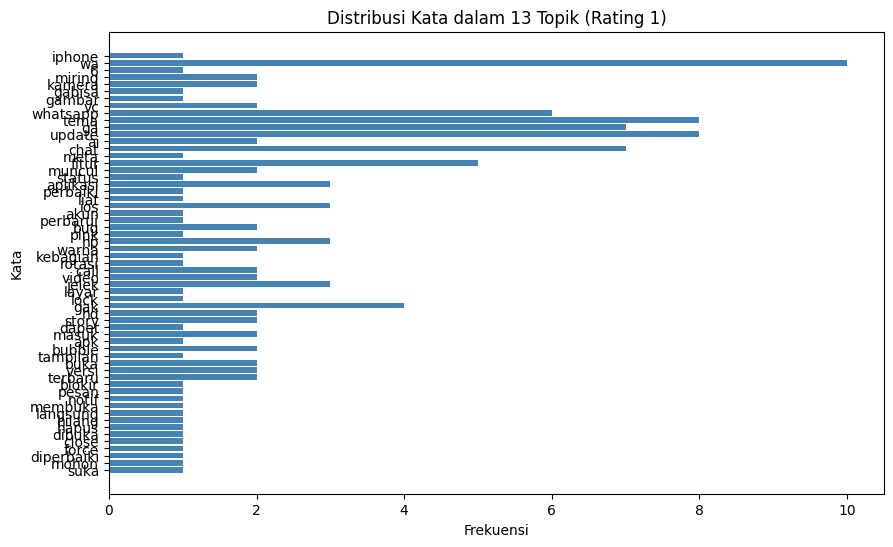


=== Proses untuk Rating 2 ===

Topik untuk Rating 2:
Topik 1: gabisa, wa, fitur, dibuka, hp, tema, video, ku, iphone, ganti
Topik 2: wa, perbaiki, ku, bubble, gbisa, thema, om, menghubungkan, pembaruan, bagus
Topik 3: chat, ga, wa, whatsapp, warna, bubble, blm, tema, ganti, tampilan
Topik 4: muncul, update, tema, wa, chat, ga, jelek, filter, warna, seminggu
Topik 5: ai, meta, wa, masuk, fitur, iphone, pesan, blm, resmi, whatsaap
Topik 6: chat, tema, meta, ga, orang, bubble, obrolan, update, ai, ganti
Topik 7: whatsapp, gk, update, call, aplikasi, jam, cnth, video, membuka, yaa
Topik 8: tema, update, whatsapp, ios, kasih, terbaru, hilang, chat, versi, ga
Topik 9: update, chat, tema, ganti, whatsapp, wa, ios, ga, bubble, gak
Topik 10: tema, chat, update, obrolan, wa, hp, terbaru, miring, iphone, dapet
Topik 11: whatsapp, video, wa, gak, dipencet, iphone, hd, wifi, akun, vc
Topik 12: video, whatsapp, bug, hd, update, gak, story, call, versi, diperbaiki
Topik 13: buka, wa, notif, aplikasi

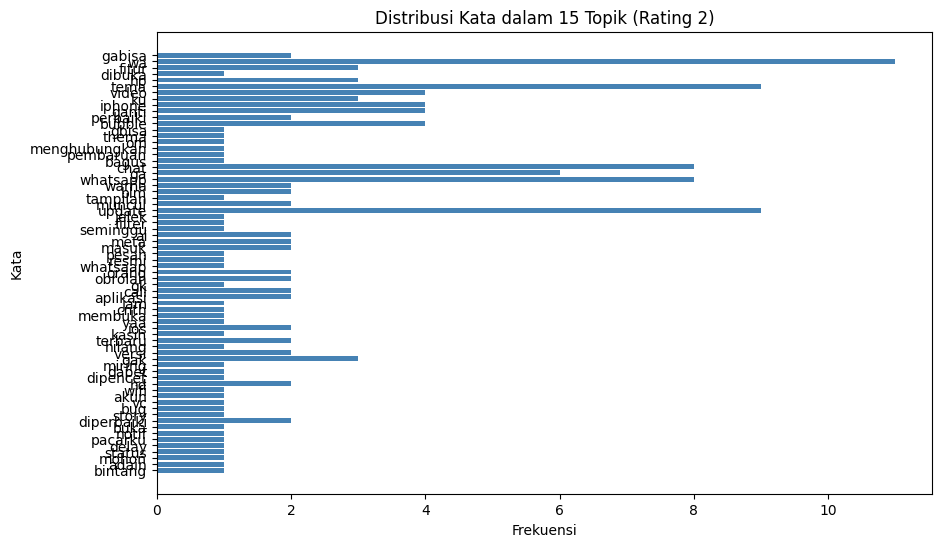


=== Proses untuk Rating 3 ===

Topik untuk Rating 3:
Topik 1: iphone, whatsapp, fitur, update, 6, ai, call, aplikasinya, ios, gambar
Topik 2: update, ku, tag, aplikasi, nama, grub, kasih, pink, wa, gabisa
Topik 3: tema, whatsapp, update, muncul, chat, ai, meta, fitur, terbaru, yaa
Topik 4: wa, ios, temanya, tema, gaada, video, perbaiki, blm, caption, post
Topik 5: whatsapp, tema, fitur, update, chat, masuk, ganti, notif, wa, ga
Topik 6: whatsapp, iphone, kontak, chat, karna, video, mohon, aplikasi, handphone, vc
Topik 7: wa, ga, perbaiki, ios, buka, masuk, tema, iphone, whatsapp, orang
Topik 8: wa, ga, update, ios, chat, tema, perbaharui, meta, status, whatsapp
Topik 9: tema, chat, bubble, ga, gabisa, iphone, org, diperbaiki, wa, whatsapp
Topik 10: chat, update, bubble, gak, whatsapp, hp, gk, ip, gabisa, ai
Topik 11: wa, ga, ip, update, muncul, chat, berubah, aplikasi, status, kek
Topik 12: chat, ganti, tema, warna, bubble, wa, fitur, versi, terbaru, ga
Topik 13: tema, update, chat, w

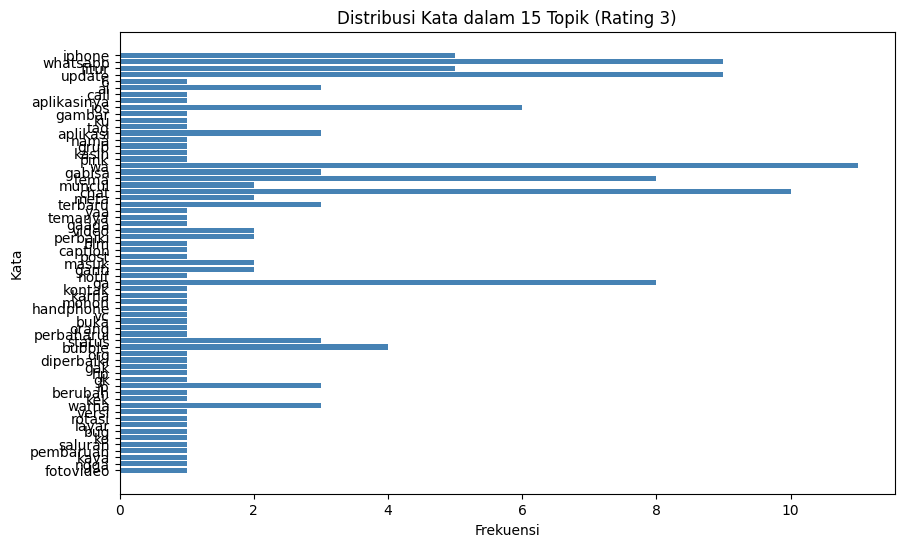


=== Proses untuk Rating 4 ===

Topik untuk Rating 4:
Topik 1: wa, chat, kamera, buka, update, pink, berkali, halaman, status, wrna
Topik 2: whatsapp, tema, fitur, ai, wa, meta, bubble, update, chat, muncul
Topik 3: wa, status, update, terkirim, fitur, terbaru, link, tdk, keren, ios
Topik 4: tema, filter, ip, fitur, ga, kayak, pengguna, nyaa, temanya, chat
Topik 5: ga, bubble, ku, fitur, ipad, gak, lihat, kebagian, aplikasi, balikin
Topik 6: update, tema, whatsapp, dapet, fitur, ganti, ga, chat, terbaru, thema
Topik 7: fitur, wa, warna, tema, tdk, video, min, hapus, whatsap, perbaiki
Topik 8: wa, tema, update, ios, ga, ku, fitur, kasi, orang, pengingat
Topik 9: wa, chat, iphone, bubble, theme, 6, sy, mohon, obrolan, whatsapp
Topik 10: tema, chat, update, whatsapp, yaa, aplikasi, hp, wa, dapet, ios
Topik 11: tema, chat, blm, default, update, hp, fitur, muncul, dapet, kasih
Topik 12: ga, chat, muncul, theme, wa, warna, vc, update, fitur, berubah
Topik 13: chat, warna, bubble, pink, ganti

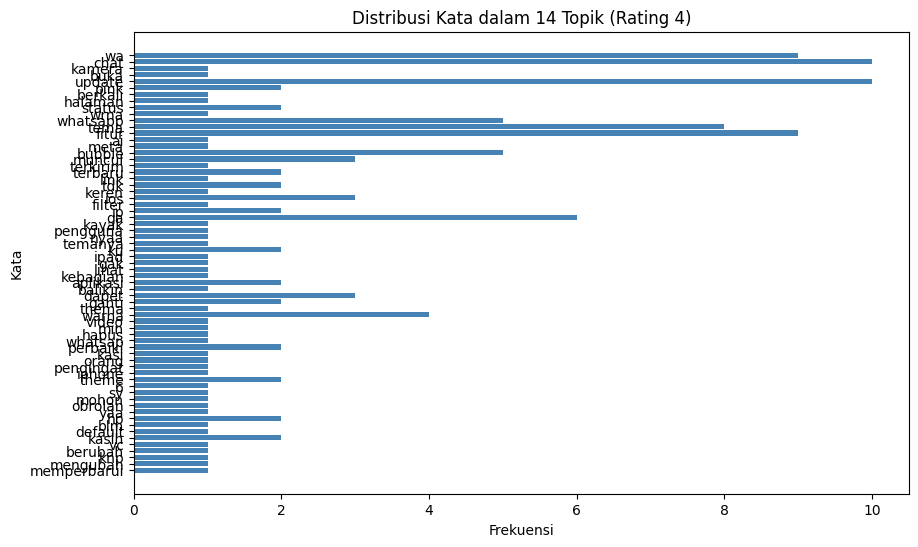


=== Proses untuk Rating 5 ===

Topik untuk Rating 5:
Topik 1: tema, whatsapp, chat, wa, dapet, warna, baguss, iphone, fitur, gabisa
Topik 2: chat, tema, whatsapp, fitur, ga, nan, muncul, update, whatsap, blm
Topik 3: tema, wa, whatsapp, chat, bagus, aplikasi, buka, blm, kasih, update
Topik 4: chat, wa, bubble, update, tema, warna, bagus, pink, whatsapp, ai
Topik 5: keren, good, theme, suka, wa, membantu, chat, berkomunikasi, fitur, foto


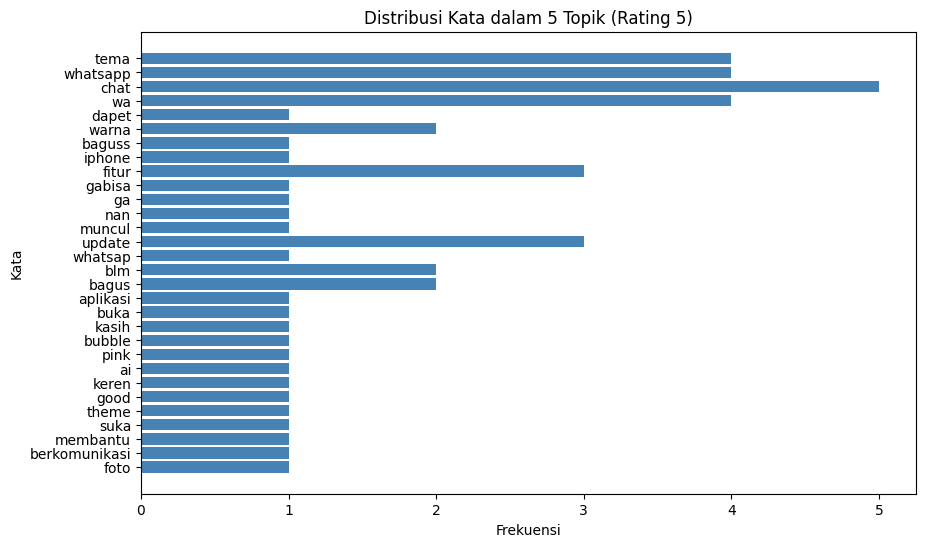

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim import corpora
from gensim.models import LdaModel
from collections import Counter
from google.colab import files
import IPython.display as display

# Membaca file CSV
df = pd.read_csv('whatsapp_appstore.csv')

# Mengonversi teks ulasan menjadi string
df['ulasan'] = df['ulasan'].astype(str)

# Urutkan rating agar output terstruktur
ratings = sorted(df['rating'].unique())

# Konfigurasi jumlah topik untuk setiap rating
topik_lda = {1: 13, 2: 15, 3: 15, 4: 14, 5: 5}

# Looping untuk setiap rating
for rating in ratings:
    print(f"\n=== Proses untuk Rating {rating} ===")

    # Memfilter ulasan berdasarkan rating
    df_rating = df[df['rating'] == rating]

    # Tokenisasi teks ulasan
    texts = df_rating['ulasan'].dropna().astype(str).tolist()
    tokenized_reviews = [text.split() for text in texts]

    # Membuat dictionary dan corpus
    dictionary = corpora.Dictionary(tokenized_reviews)
    corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

    # Mendapatkan jumlah topik dari konfigurasi
    num_topics = topik_lda.get(rating, 5)  # Default ke 5 jika tidak ada di konfigurasi

    # Membangun model LDA
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

    # Menampilkan topik dan kata-kata teratas dalam setiap topik
    print(f"\nTopik untuk Rating {rating}:")
    for i, topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
        top_words = [word for word, _ in topic]
        print(f"Topik {i+1}: {', '.join(top_words)}")

    # Visualisasi distribusi kata dalam topik menggunakan bar chart horizontal
    topic_words_count = Counter()
    for i, topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
        for word, _ in topic:
            topic_words_count[word] += 1

    # Visualisasi Bar Chart Horizontal
    plt.figure(figsize=(10, 6))
    plt.barh(list(topic_words_count.keys()), list(topic_words_count.values()), color='steelblue')
    plt.xlabel('Frekuensi')
    plt.ylabel('Kata')
    plt.title(f'Distribusi Kata dalam {num_topics} Topik (Rating {rating})')
    plt.gca().invert_yaxis()
    plt.show()

    # Visualisasi dengan pyLDAvis di output cell Google Colab
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    display.display(pyLDAvis.display(vis))  # Menampilkan langsung di output cell



NMF per rating


=== Proses untuk Rating 1 ===

Topik untuk Rating 1:
Topik 1: wa, masuk, jelek, buka, ios, ga, vc, gak, pesan, hd
Topik 2: tema, chat, fitur, bubble, warna, dapet, ga, hilang, whatsapp, pink
Topik 3: ai, meta, whatsapp, iphone, muncul, aplikasi, hp, fitur, versi, perbaiki
Topik 4: update, dibuka, force, close, ga, terbaru, versi, gimana, aplikasi, gak


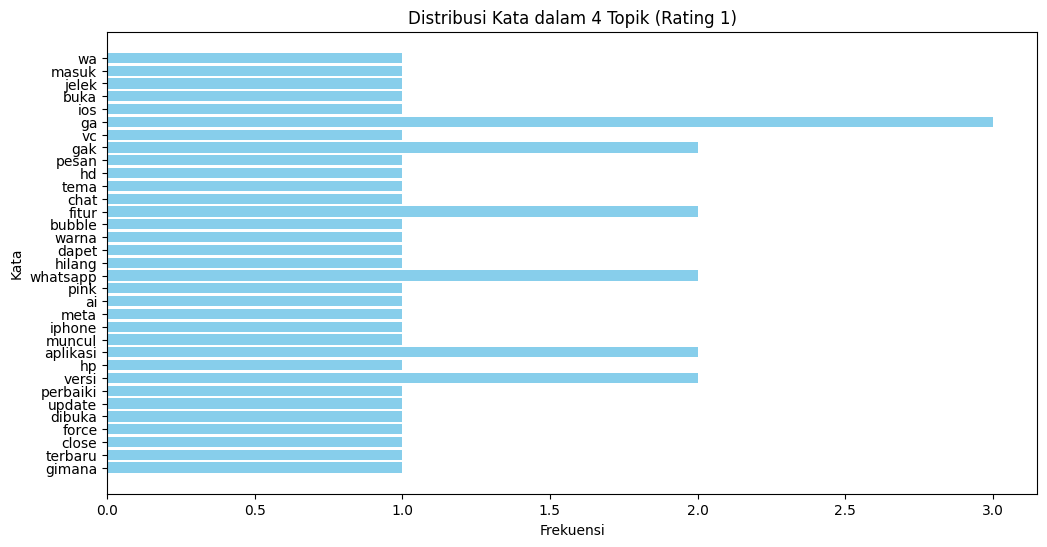


=== Proses untuk Rating 2 ===

Topik untuk Rating 2:
Topik 1: wa, ga, muncul, buka, notif, masuk, perbaiki, kaya, aplikasi, iphone
Topik 2: tema, chat, bubble, ganti, warna, hilang, pink, obrolan, fitur, blm
Topik 3: update, whatsapp, ios, gak, terbaru, diperbaiki, bug, versi, mohon, dibuka
Topik 4: ai, meta, fitur, tersedia, mengaktifkan, hp, xr, iphone, bantu, ngga


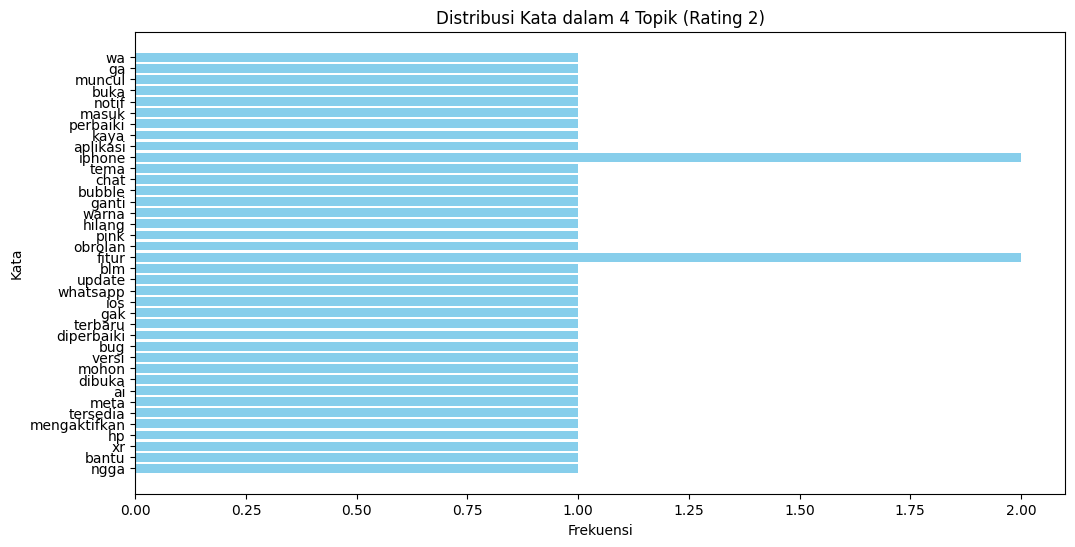


=== Proses untuk Rating 3 ===

Topik untuk Rating 3:
Topik 1: update, wa, ga, ios, tema, fitur, meta, ai, muncul, whatsapp
Topik 2: chat, tema, bubble, ganti, warna, fitur, whatsapp, hilang, chatnya, default


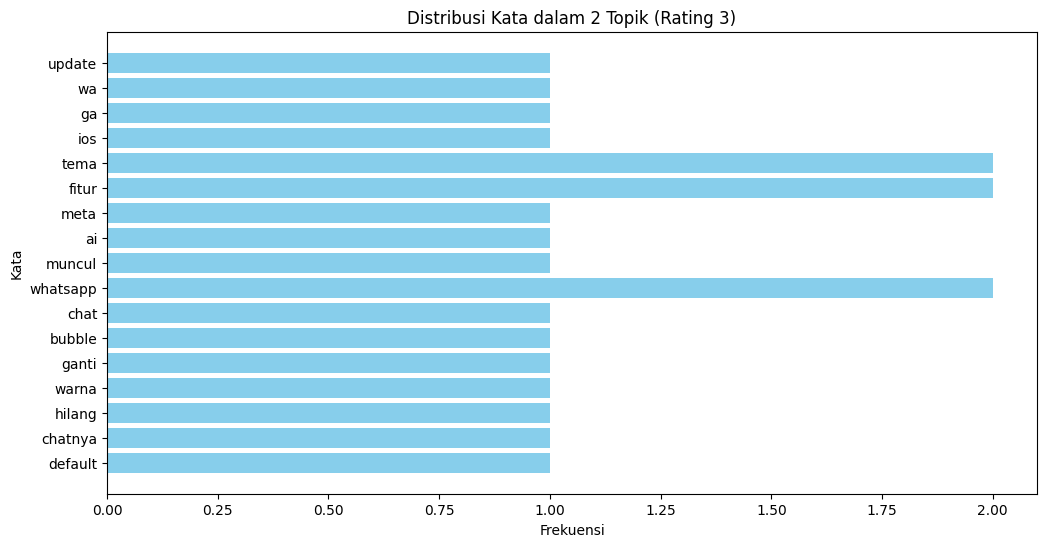


=== Proses untuk Rating 4 ===

Topik untuk Rating 4:
Topik 1: tema, update, whatsapp, dapet, wa, muncul, fitur, ios, terbaru, ai
Topik 2: chat, bubble, warna, fitur, theme, pink, ga, ganti, blm, ip


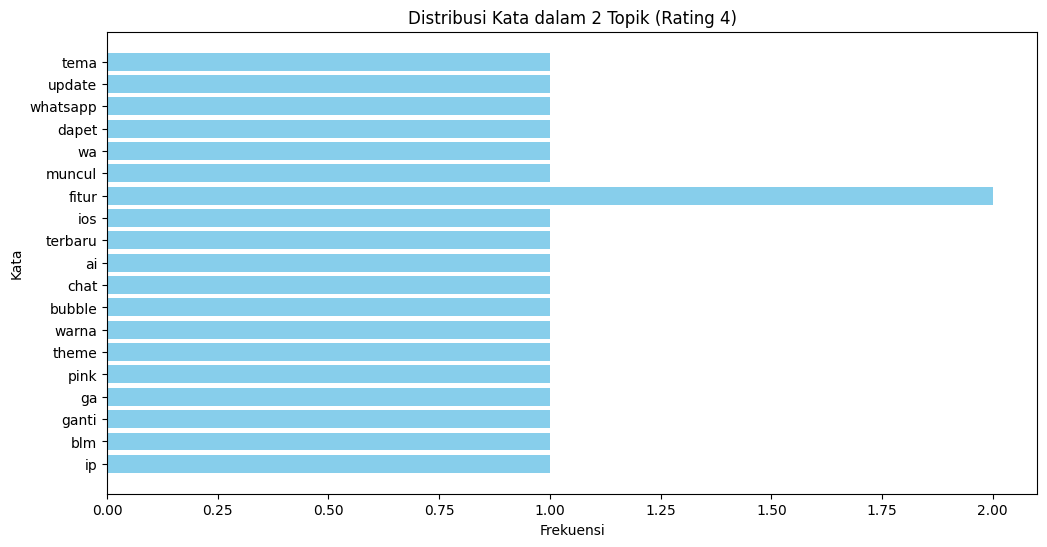


=== Proses untuk Rating 5 ===

Topik untuk Rating 5:
Topik 1: tema, chat, whatsapp, wa, bubble, update, pink, warna, fitur, kasih
Topik 2: bagus, keren, apk, aplikasi, cepat, ka, cuman, andalan, bangettt, lek


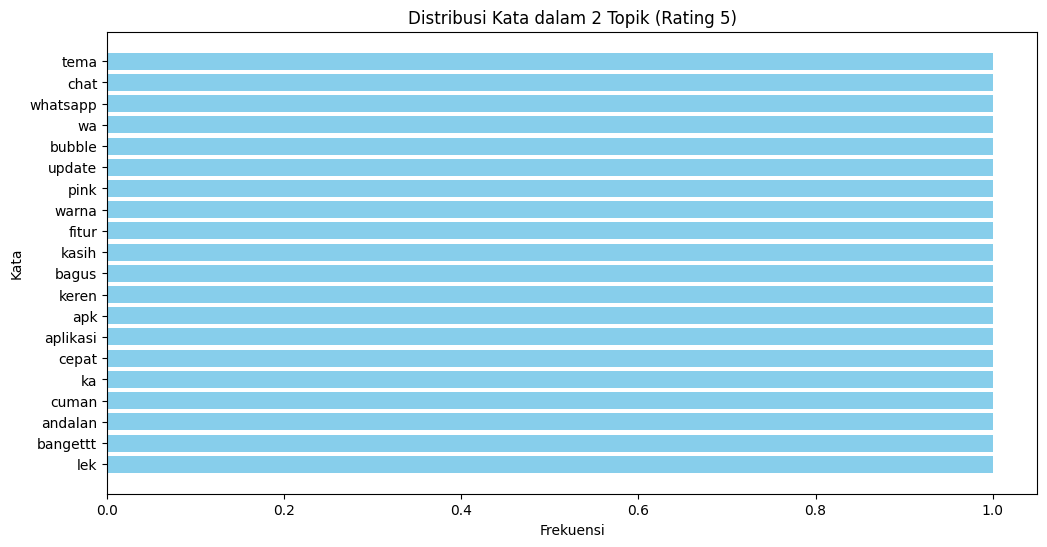

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim.models import LdaModel
from collections import Counter
from google.colab import files
import IPython.display as display

# Membaca file CSV
df = pd.read_csv('whatsapp_appstore.csv')

# Mengelompokkan ulasan berdasarkan rating
df['ulasan'] = df['ulasan'].astype(str)
ratings = sorted(df['rating'].unique())  # Mengurutkan rating agar rapi

# Menentukan jumlah topik tetap untuk setiap rating
# Change the minimum number of topics to 2
topic_counts = {1: 4, 2: 4, 3: 2, 4: 2, 5: 2}

def get_topics_with_fixed_number(texts, num_topics):
    """ Menentukan topik menggunakan NMF dengan jumlah yang sudah ditentukan """
    tokenized_reviews = [text.split() for text in texts]
    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    dictionary = corpora.Dictionary(tokenized_reviews)
    features = vectorizer.get_feature_names_out()

    # Model NMF
    nmf_model = NMF(n_components=num_topics, random_state=42)
    W = nmf_model.fit_transform(tfidf_matrix)
    H = nmf_model.components_

    # Mengurutkan topik berdasarkan nilai rata-rata setiap komponen dalam H
    sorted_topics_idx = np.argsort(np.mean(H, axis=1))[::-1]
    sorted_H = H[sorted_topics_idx]

    # Ekstraksi topik dari komponen H yang sudah diurutkan
    topics = [[features[i] for i in topic.argsort()[:-10 - 1:-1]] for topic in sorted_H]

    return topics, dictionary, tokenized_reviews

# Proses berdasarkan rating yang berbeda
for rating in ratings:
    if rating in topic_counts:
        num_topics = topic_counts[rating]
        print(f"\n=== Proses untuk Rating {rating} ===")

        # Memfilter ulasan berdasarkan rating
        df_rating = df[df['rating'] == rating]
        texts = df_rating['ulasan'].dropna().tolist()

        # Ekstraksi topik menggunakan NMF
        topics, dictionary, tokenized_reviews = get_topics_with_fixed_number(texts, num_topics)

        # Menampilkan hasil topik
        print(f"\nTopik untuk Rating {rating}:")
        all_topic_words = []
        for i, topic in enumerate(topics, 1):
            print(f"Topik {i}: {', '.join(topic)}")
            all_topic_words.extend(topic)  # Menggabungkan semua kata topik untuk visualisasi

        # Visualisasi distribusi kata dalam topik (seperti metode KMeans)
        word_counts = Counter(all_topic_words)

        plt.figure(figsize=(12, 6))
        plt.barh(list(word_counts.keys()), list(word_counts.values()), color='skyblue')
        plt.xlabel('Frekuensi')
        plt.ylabel('Kata')
        plt.title(f'Distribusi Kata dalam {num_topics} Topik (Rating {rating})')
        plt.gca().invert_yaxis()
        plt.show()

        # Mengonversi ulasan ke format LDA
        corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

        # Membangun model LDA untuk digunakan di pyLDAvis
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

        # Menampilkan pyLDAvis
        vis = gensimvis.prepare(lda_model, corpus, dictionary)
        display.display(pyLDAvis.display(vis))

Bert Per Rating


=== Proses untuk Rating 1 ===

Topik untuk Rating 1:
Topik 1: vc, miring, rotasi, hp, wa, ga, kamera, bug, muter, rotasinya
Topik 2: video, whatsapp, chat, call, wa, hp, update, rotasi, gak, aplikasi
Topik 3: iphone, update, ios, wa, whatsapp, 6, chat, gak, fitur, versi
Topik 4: wa, whatsapp, fitur, chat, aplikasi, ga, gak, akun, ios, masuk
Topik 5: wa, tema, fitur, whatsapp, pesan, buka, ga, chat, gak, aplikasi
Topik 6: tema, wa, whatsapp, fitur, ga, ios, chat, meta, ai, hapus
Topik 7: bubble, tema, pink, chat, wa, ga, warna, update, fitur, dapet
Topik 8: update, wa, tema, ga, whatsapp, chat, gak, status, ai, fitur
Topik 9: i, cant, chat, theme, bad, bug, chage, my, dont, have


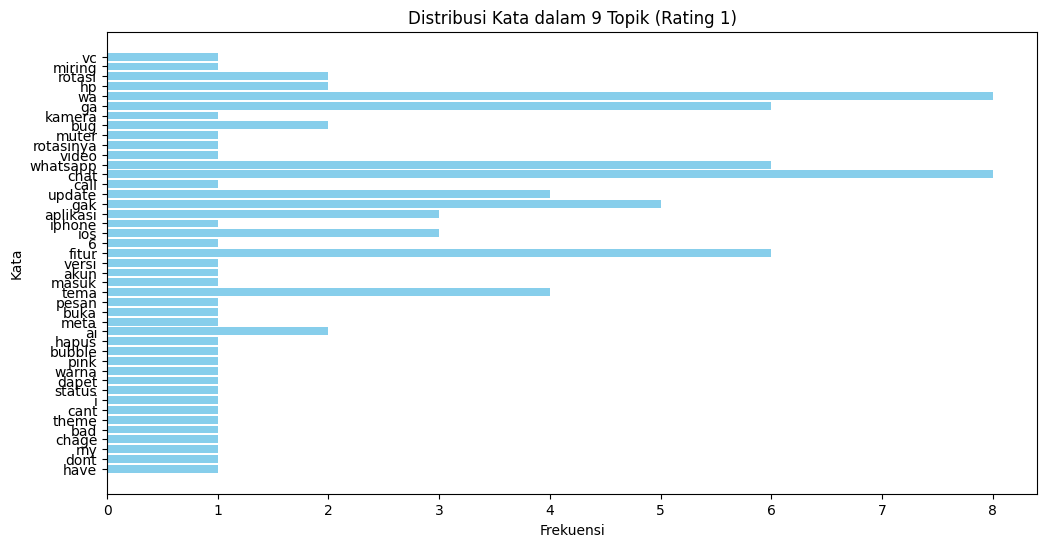


=== Proses untuk Rating 2 ===

Topik untuk Rating 2:
Topik 1: whatsapp, chat, update, iphone, ios, tema, wa, bubble, video, fitur
Topik 2: wa, tema, update, ga, whatsapp, chat, fitur, buka, hp, muncul


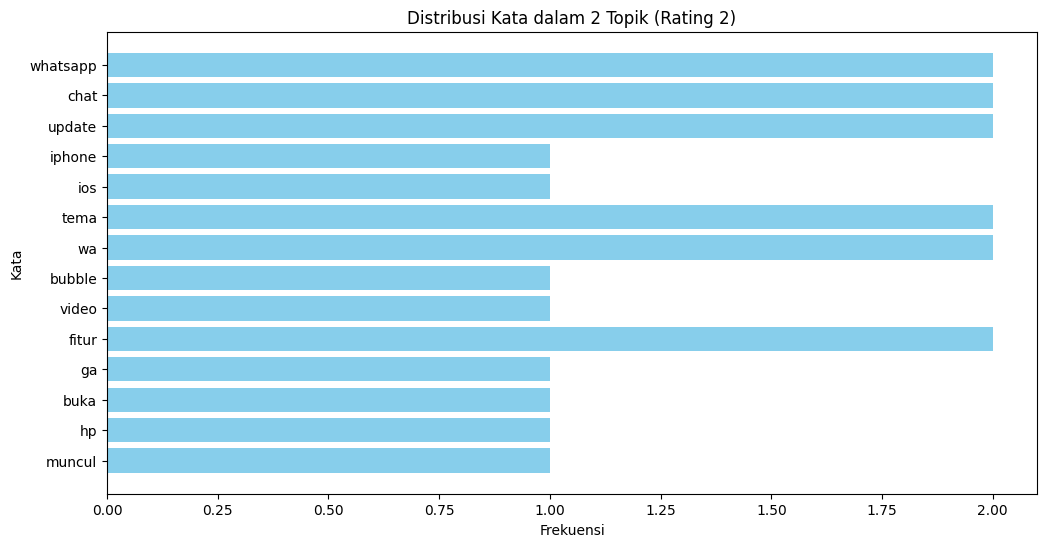


=== Proses untuk Rating 3 ===

Topik untuk Rating 3:
Topik 1: chat, iphone, update, ios, whatsapp, wa, tema, bubble, fitur, terbaru
Topik 2: tema, wa, chat, update, whatsapp, ga, warna, fitur, bubble, ganti


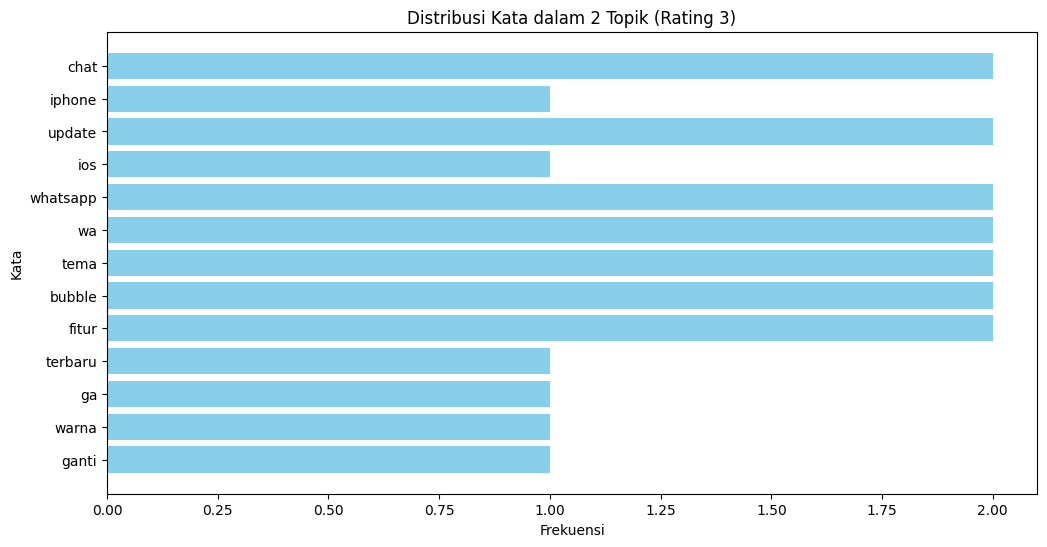


=== Proses untuk Rating 4 ===

Topik untuk Rating 4:
Topik 1: tema, whatsapp, wa, fitur, chat, warna, ga, dapet, perbaiki, bagus
Topik 2: update, chat, tema, bubble, whatsapp, wa, fitur, ga, pink, warna


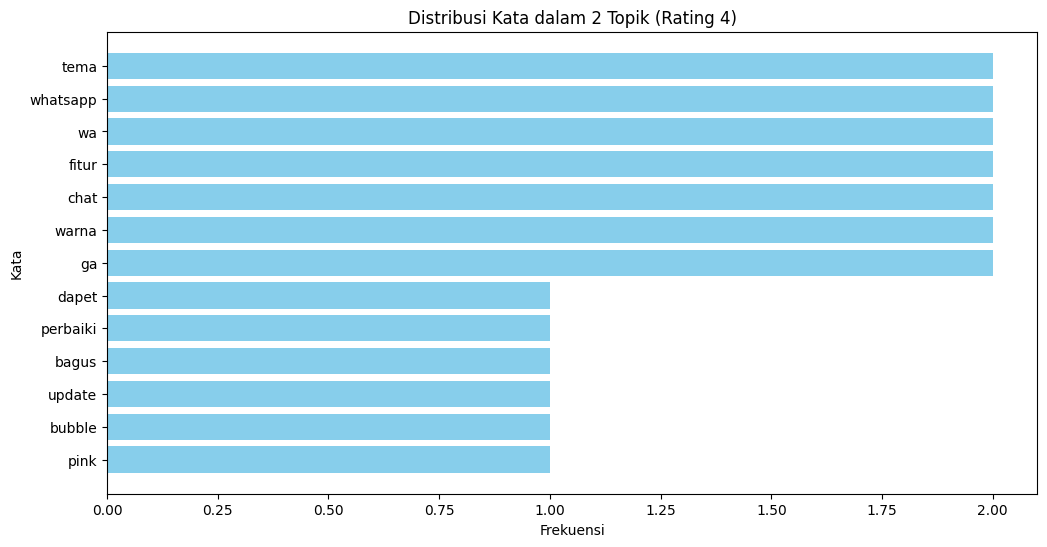


=== Proses untuk Rating 5 ===

Topik untuk Rating 5:
Topik 1: iphone, tema, wa, update, ios, whatsapp, hp, chat, warna, mohon
Topik 2: bagus, nan, good, keren, whatsapp, mantap, nice, wa, thanks, baguss
Topik 3: tema, wa, whatsapp, fitur, bagus, kasih, chat, blm, aplikasi, warna
Topik 4: chat, update, tema, bubble, whatsapp, wa, fitur, warna, kasih, ga
Topik 5: pink, tema, wa, chat, warna, update, ku, bubble, muncul, pengen


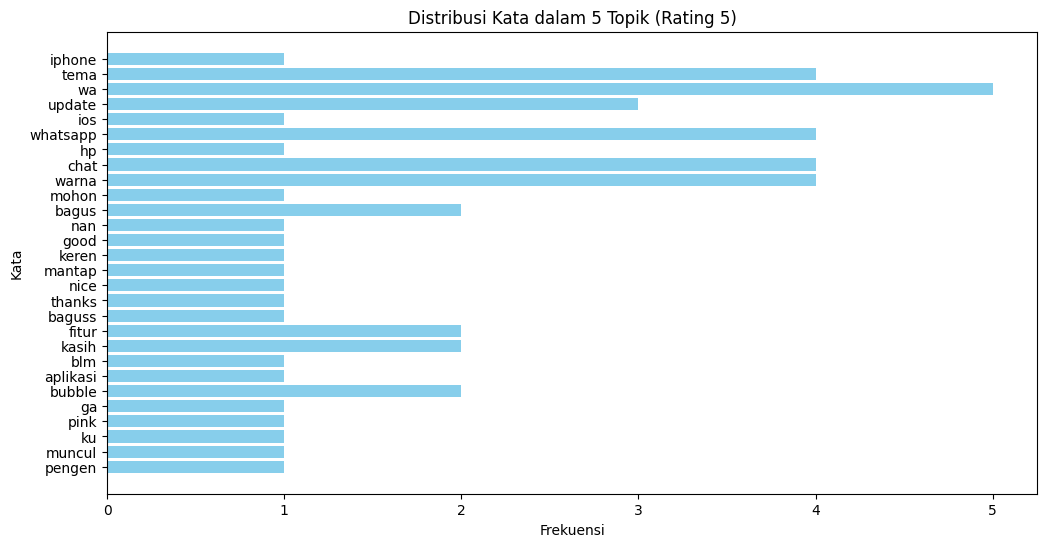

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from gensim import corpora
from gensim.models import LdaModel
from collections import Counter
from google.colab import files
import IPython.display as display

# Membaca file CSV
df = pd.read_csv('whatsapp_appstore.csv')

# Mengelompokkan ulasan berdasarkan rating
df['ulasan'] = df['ulasan'].astype(str)
ratings = sorted(df['rating'].unique())

# Menggunakan model BERT untuk embedding
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Konfigurasi jumlah topik untuk setiap rating
topic_counts = {1: 9, 2: 2, 3: 2, 4: 2, 5: 5}

def extract_topics(texts, num_topics):
    """ Melakukan clustering dengan KMeans untuk ekstraksi topik """
    tokenized_reviews = [text.split() for text in texts]
    embeddings = model.encode(texts)

    # Clustering menggunakan KMeans
    kmeans_model = KMeans(n_clusters=num_topics, random_state=42)
    kmeans_model.fit(embeddings)
    cluster_assignments = kmeans_model.labels_

    topics = [[] for _ in range(num_topics)]
    for idx, label in enumerate(cluster_assignments):
        topics[label].extend(tokenized_reviews[idx])

    # Menghitung kata teratas dalam setiap topik
    top_words_per_topic = []
    for topic in topics:
        word_counts = Counter(topic)
        top_words = [word for word, _ in word_counts.most_common(10)]
        top_words_per_topic.append(top_words)

    return top_words_per_topic, tokenized_reviews

# Proses per rating
for rating in ratings:
    if rating in topic_counts:
        num_topics = topic_counts[rating]
        print(f"\n=== Proses untuk Rating {rating} ===")

        # Memfilter ulasan berdasarkan rating
        df_rating = df[df['rating'] == rating]
        texts = df_rating['ulasan'].dropna().tolist()

        # Ekstraksi topik
        top_words, tokenized_reviews = extract_topics(texts, num_topics)

        # Menampilkan hasil topik
        print(f"\nTopik untuk Rating {rating}:")
        topic_words = []
        for i, words in enumerate(top_words, 1):
            print(f"Topik {i}: {', '.join(words)}")
            topic_words.extend(words)

        # Visualisasi distribusi kata dalam topik
        word_counts = Counter(topic_words)

        plt.figure(figsize=(12, 6))
        plt.barh(list(word_counts.keys()), list(word_counts.values()), color='skyblue')
        plt.xlabel('Frekuensi')
        plt.ylabel('Kata')
        plt.title(f'Distribusi Kata dalam {num_topics} Topik (Rating {rating})')
        plt.gca().invert_yaxis()
        plt.show()

        # ==================== Tambahan: PyLDAvis untuk Visualisasi Topik ====================
        # Membuat dictionary untuk LDA
        dictionary = corpora.Dictionary(tokenized_reviews)
        corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

        # Membangun model LDA
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

        # Menampilkan pyLDAvis
        vis = gensimvis.prepare(lda_model, corpus, dictionary)
        display.display(pyLDAvis.display(vis))
